In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Done")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv
Done


In [2]:
df=pd.read_csv("../input/drug-classification/drug200.csv")
m,n=df.shape
print(m,n)

200 6


In [3]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df=pd.read_csv("../input/drug-classification/drug200.csv")
for i in df.BP.values:
    if (i  == 'LOW'):
        df.BP.replace(i,0,inplace=True)
    elif (i=="NORMAL"):
        df.BP.replace(i,1,inplace=True)
    elif (i=="HIGH"):
        df.BP.replace(i,2,inplace=True)
print (df.BP.values)      
        

[2 0 0 1 0 1 1 0 1 0 0 2 0 0 1 2 0 2 0 2 0 1 0 0 0 2 2 1 0 0 1 2 0 2 1 1 2
 0 1 1 1 2 1 1 1 1 2 0 1 0 2 1 0 2 2 0 2 2 1 2 0 2 0 0 2 1 2 1 1 2 2 1 1 1
 2 0 2 2 2 0 2 1 0 2 0 2 1 0 2 1 1 2 2 0 0 0 0 2 2 2 2 2 0 1 2 0 1 0 2 1 2
 1 0 0 1 2 1 1 2 2 1 2 1 1 2 2 2 1 0 1 1 0 0 1 2 0 2 2 2 1 2 0 2 2 2 1 0 2
 0 0 2 2 1 0 0 0 2 0 0 0 1 2 1 2 2 0 0 1 0 2 1 0 1 0 2 2 2 1 1 1 2 1 0 2 2
 1 2 2 2 2 2 2 0 0 2 0 0 1 1 0]


In [6]:

for i in df.Sex.values:
    if (i  == 'M'):
        df.Sex.replace(i,1,inplace=True)
    elif (i=="F"):
        df.Sex.replace(i,0,inplace=True)
print (df.Sex.values) 
        
    
    


[0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0]


In [7]:


for i in df.Cholesterol.values:
    if (i  == 'HIGH'):
        df.Cholesterol.replace(i,1,inplace=True)
    elif (i=="NORMAL"):
        df.Cholesterol.replace(i,0,inplace=True)
        

In [8]:
xdf=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
ydf=df["Drug"]


In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(xdf,ydf,test_size=.2)

In [10]:
model=dtc(max_depth=5)

In [11]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [12]:
pred_model=model.predict(xtest)

In [13]:
accuracy_score(ytest,pred_model)*100

100.0

In [14]:
feature_names=df.columns[:5]
target_names=df["Drug"].unique().tolist()
print(type(target_names))

<class 'list'>


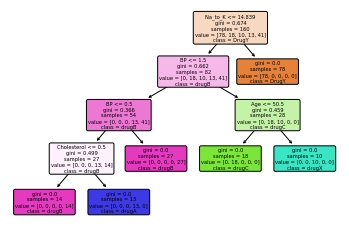

In [15]:
plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 